In [1]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime 
%matplotlib inline
import geopandas as gpd

from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates

In [2]:
#importing the data
df = pd.read_csv('covid_19_data.csv')
#df_confirmed = pd.read_csv('time_series_covid_19_confirmed.csv')
#df_deaths = pd.read_csv('time_series_covid_19_deaths.csv')
#df_recovered = pd.read_csv('time_series_covid_19_recovered.csv')
#df_confirmed_US = pd.read_csv('time_series_covid_19_confirmed_US.csv')
#df_deaths_US = pd.read_csv('time_series_covid_19_deaths_US.csv')

In [3]:
#renaming the data
df.rename(columns = {'ObservationDate': 'Date', 'Country/Region': 'Country'}, inplace = True)
#df_confirmed.rename(columns = {'Country/Region': 'Country'}, inplace = True)
#df_deaths.rename(columns = {'Country/Region': 'Country'}, inplace = True)
#df_recovered.rename(columns = {'Country/Region': 'Country'}, inplace = True)


In [4]:
df['Date'] = pd.to_datetime(df['Date'])

Confirmed = df.groupby('Date').sum()['Confirmed'].reset_index()
Deaths = df.groupby('Date').sum()['Deaths'].reset_index()
Recovered = df.groupby('Date').sum()['Recovered'].reset_index()

/Users/Brittney/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


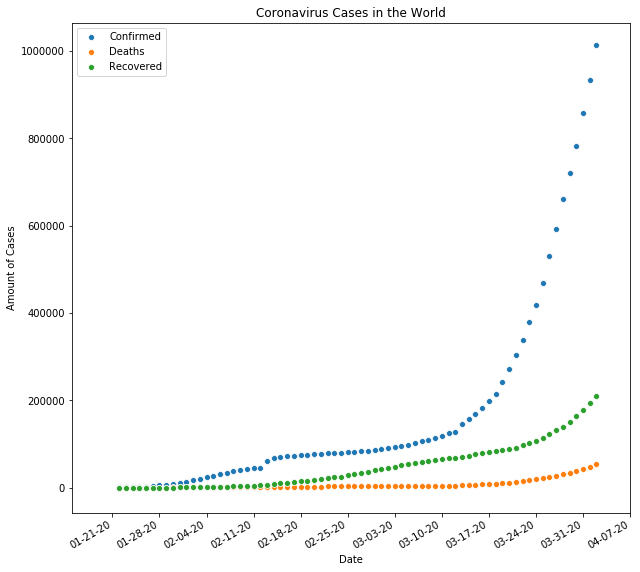

In [5]:
fig, ax = plt.subplots(figsize=(10, 10))

sns.scatterplot(x='Date', y='Confirmed', data = Confirmed, ax=ax)
sns.scatterplot(x='Date', y='Deaths', data = Deaths,ax=ax)
sns.scatterplot(x='Date', y='Recovered', data = Recovered, ax=ax)

ax.set(xlabel="Date",
       ylabel="Amount of Cases",
       title="Coronavirus Cases in the World")
ax.legend(('Confirmed','Deaths','Recovered'))

# rotate and align the tick labels so they look better
fig.autofmt_xdate()
plt.xlim([datetime.date(2020, 1, 15), datetime.date(2020, 4, 7)])

# Define the date format
date_form = DateFormatter("%m-%d-%y")
ax.xaxis.set_major_formatter(date_form)

# Ensure a major tick for each week using (interval=1) 
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))

#plt.title('Coronavirus Cases in the World')
plt.show()


In [9]:
#converting dates to Day of outbreak for model 

Confirmed['Date'] = pd.to_datetime(Confirmed['Date'])

Confirmed['Dates']= Confirmed['Date'].map(datetime.datetime.toordinal)
Confirmed['Days of Outbreak'] = (1 + Confirmed['Dates'] - Confirmed['Dates'].min())

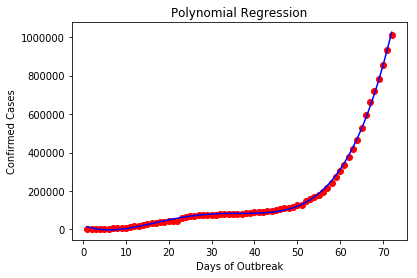

In [20]:
# Model 1 
# Prediction of Confirmed Cases

X = Confirmed[['Days of Outbreak']]
y = Confirmed[['Confirmed']]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

from sklearn.linear_model import LinearRegression
lm = LinearRegression()

from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X)
poly_reg.fit(X_poly, y)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)
predictions = lin_reg_2.predict(poly_reg.fit_transform(X))

#plotting model and fit
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg_2.predict(poly_reg.fit_transform(X)), color = 'blue')
plt.title('Polynomial Regression')
plt.xlabel('Days of Outbreak')
plt.ylabel('Confirmed Cases')
plt.show()

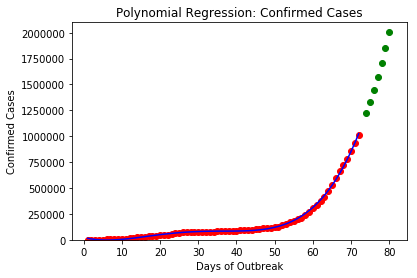

In [23]:
#adding new predicted data points from using model 1
x_new = np.array([74,75,76,77,78,79,80])
predict_newdata = lin_reg_2.predict(poly_reg.fit_transform(x_new.reshape(-1,1)))

#plotting model and fit
plt.scatter(X, y, color = 'red')
plt.scatter(x_new,predict_newdata,color = 'green')
plt.plot(X, lin_reg_2.predict(poly_reg.fit_transform(X)), color = 'blue')
plt.ylim(0,2100000)
plt.title('Polynomial Regression: Confirmed Cases')
plt.xlabel('Days of Outbreak')
plt.ylabel('Confirmed Cases')
plt.show()